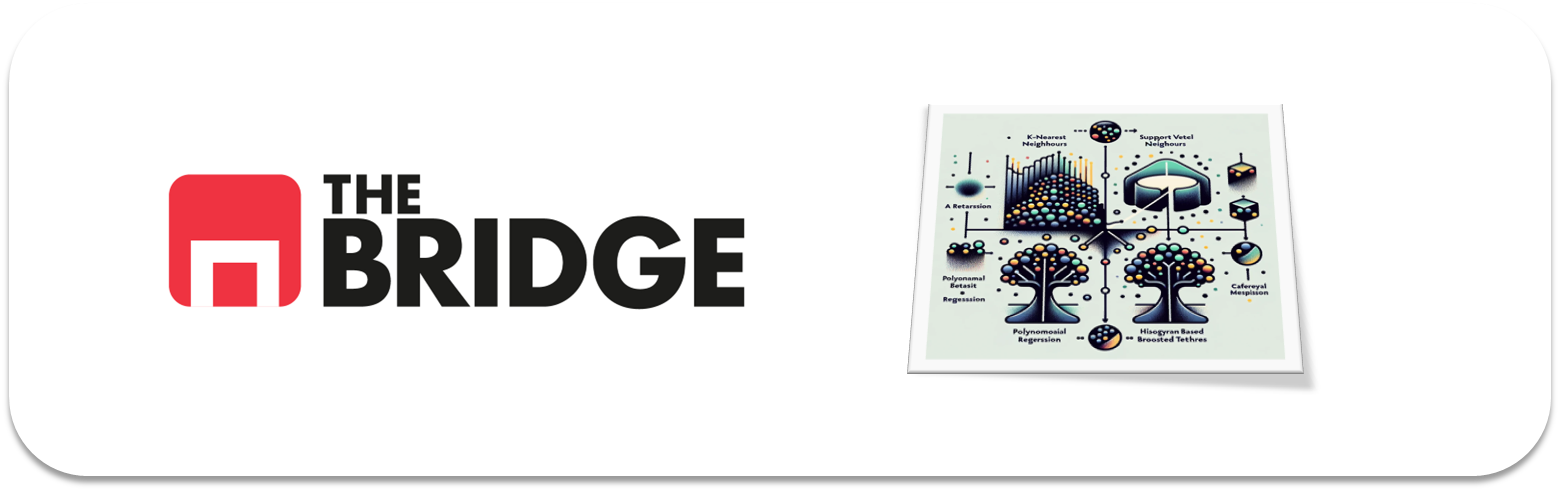

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import bootcampviztools as bt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [3]:
df = pd.read_csv("./data/credit_npo.csv")
df.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

In [5]:
target = df["SeriousDlqin2yrs"]

### #1.3
Pinta la distribución de frecuencias del target y coméntala

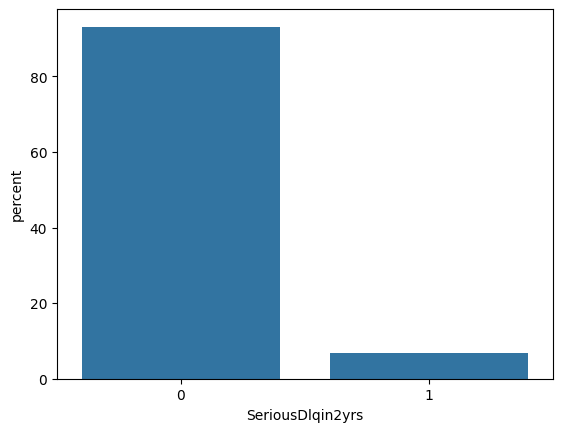

In [6]:
sns.countplot(x = target, data= df, stat= "percent");

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [7]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [8]:
features = train_set.drop("SeriousDlqin2yrs", axis = 1).columns.to_list()



In [9]:
train_set.dropna(inplace= True)
test_set.dropna(inplace = True)

In [10]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

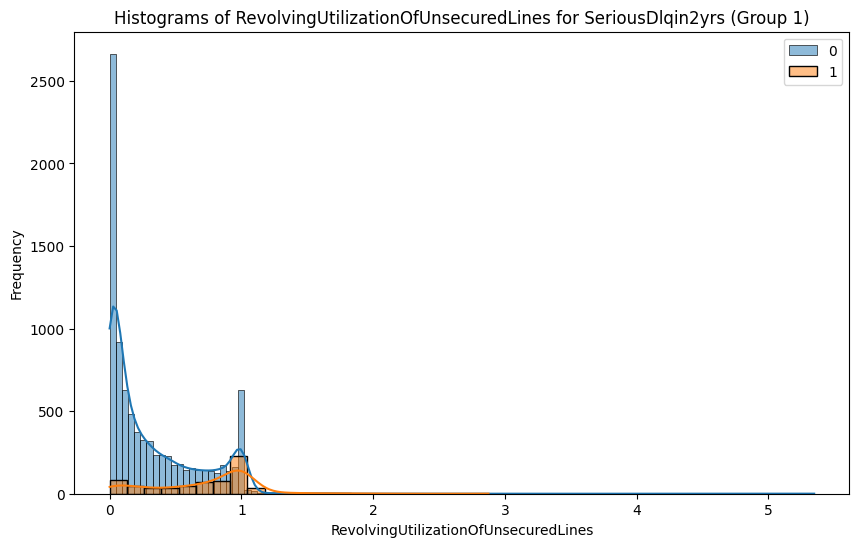

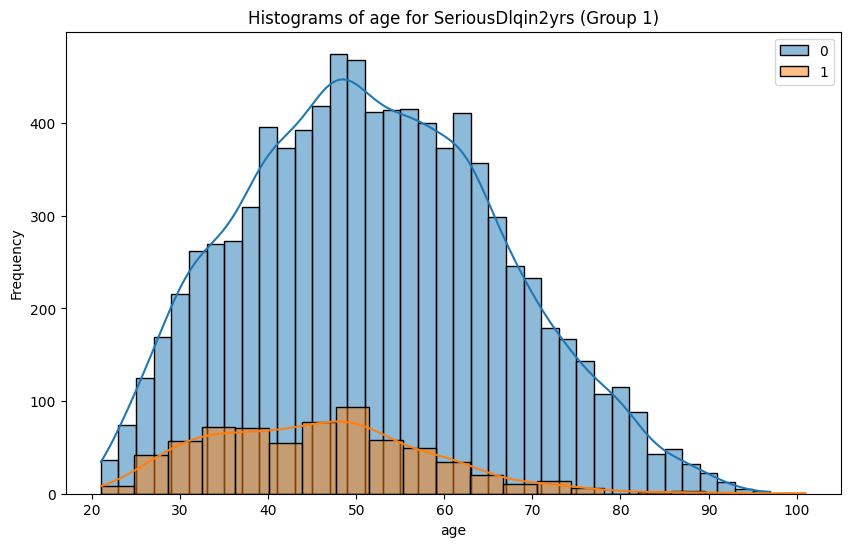

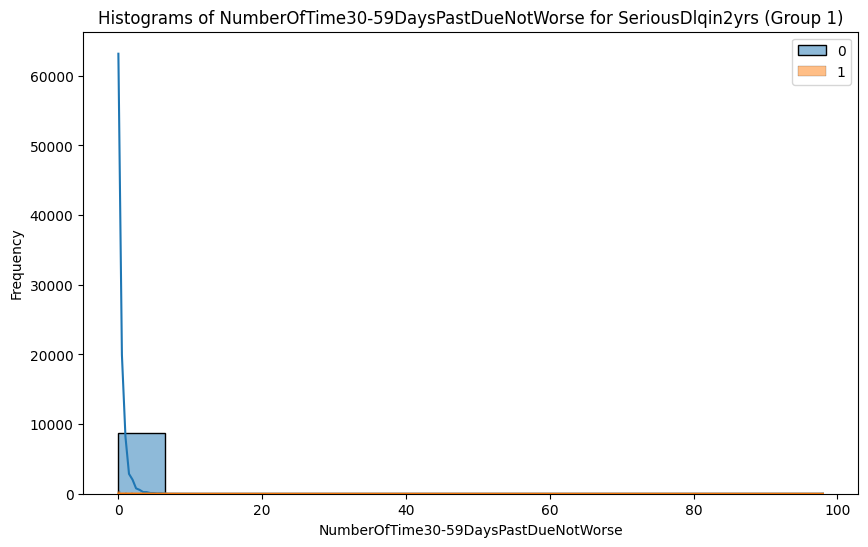

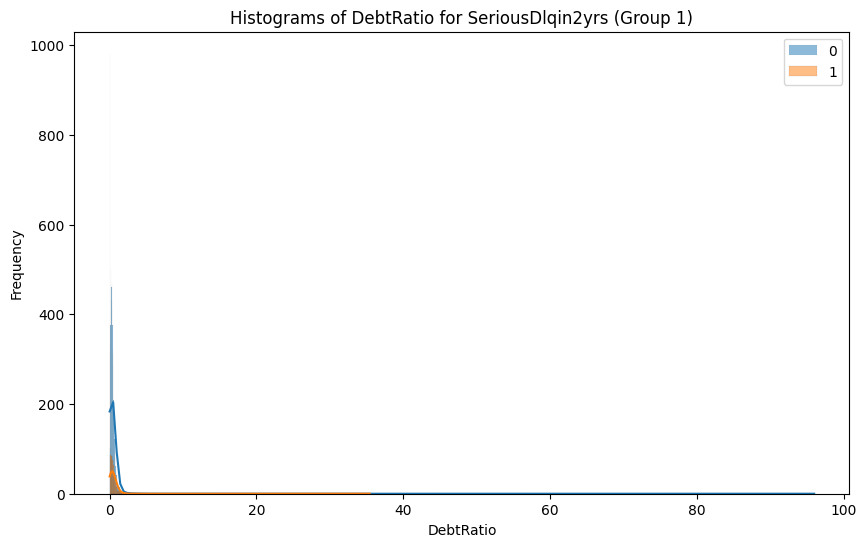

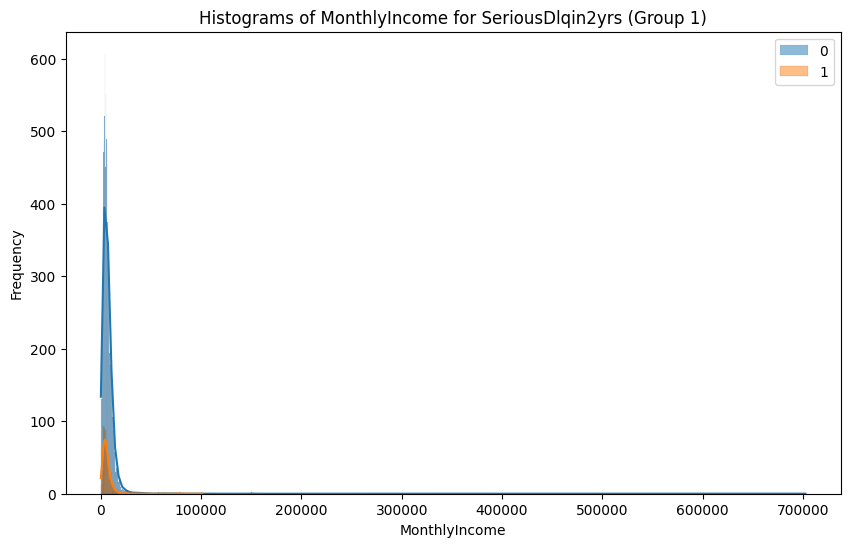

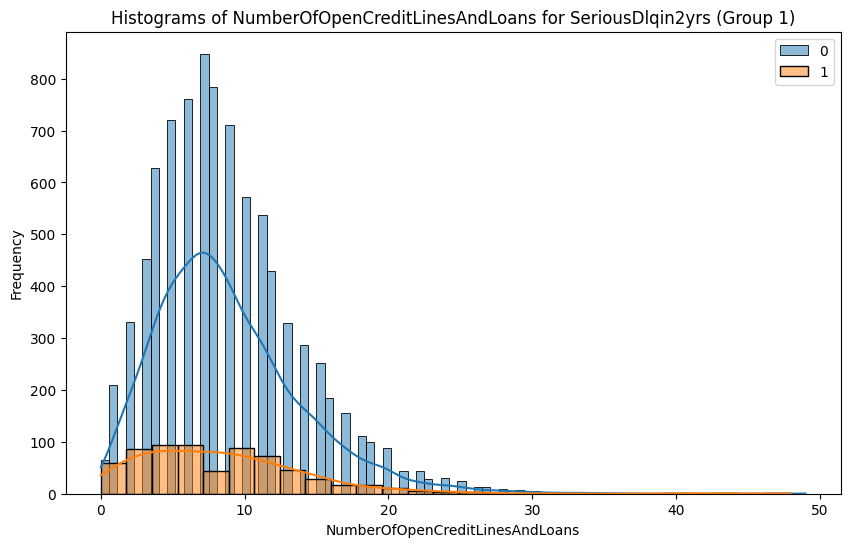

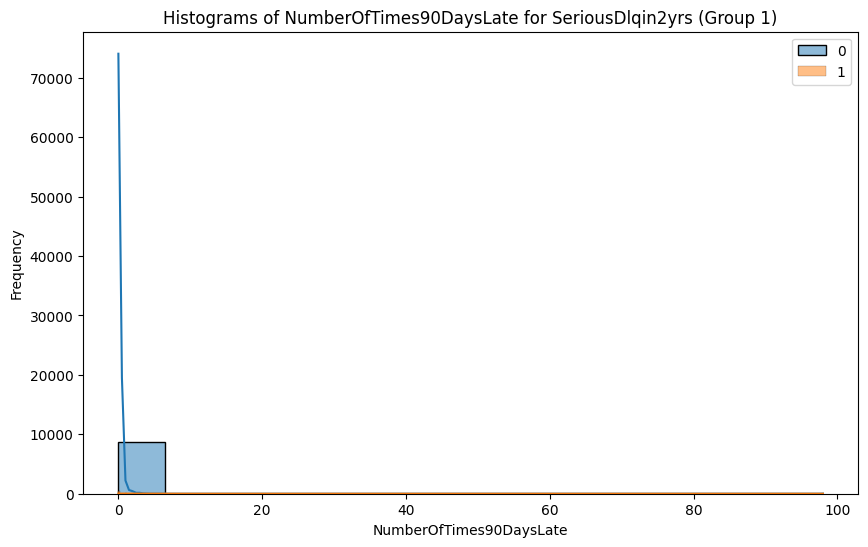

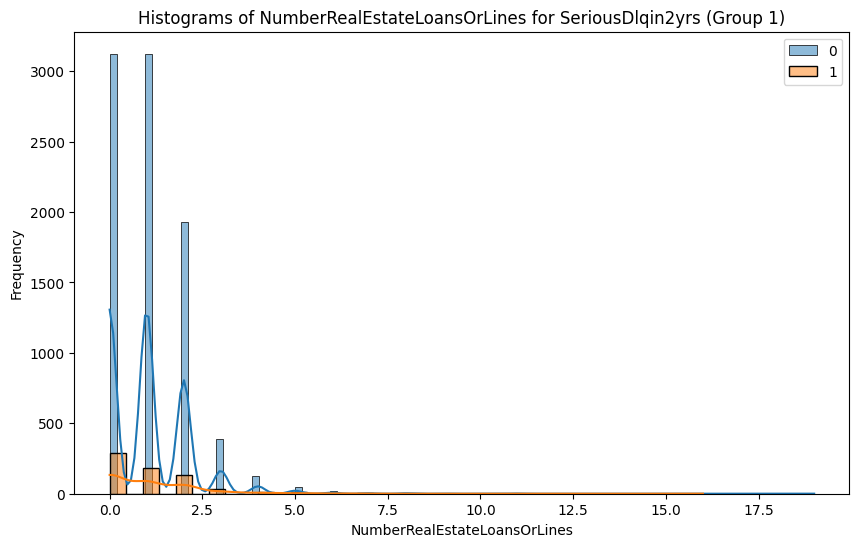

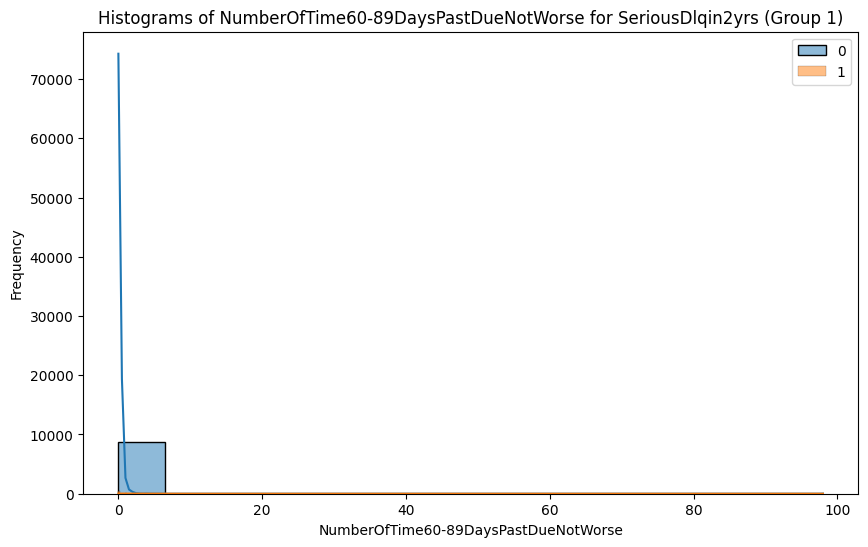

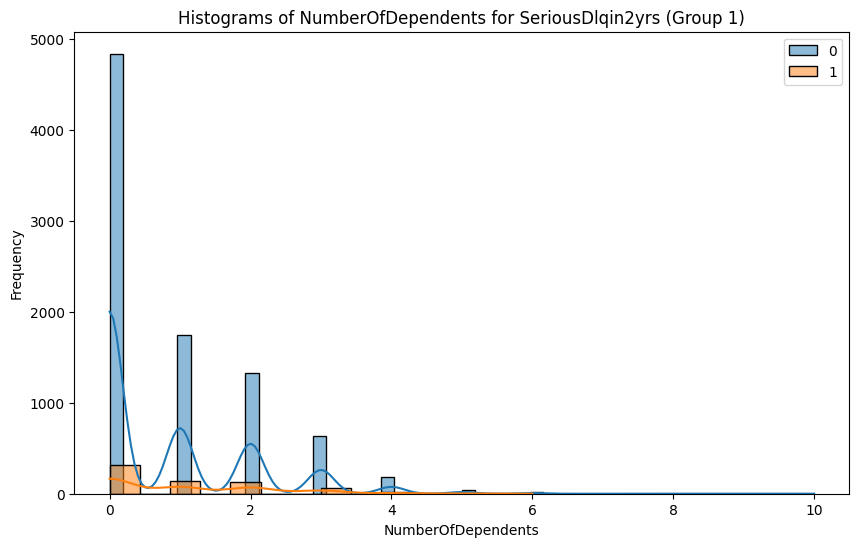

In [11]:
for col in features:
    bt.plot_grouped_histograms(train_set, cat_col= "SeriousDlqin2yrs", num_col= col, group_size= 2)
    

In [12]:
X_train = train_set[features]
y_train = train_set["SeriousDlqin2yrs"]
X_test = test_set[features]
y_test = test_set["SeriousDlqin2yrs"]

In [13]:
tree_clf = DecisionTreeClassifier(random_state= 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
print(classification_report(y_test, tree_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2202
           1       0.23      0.26      0.25       156

    accuracy                           0.89      2358
   macro avg       0.59      0.60      0.59      2358
weighted avg       0.90      0.89      0.90      2358



In [15]:
forest_clf = RandomForestClassifier(random_state= 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
print(classification_report(y_test, forest_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2202
           1       0.60      0.23      0.33       156

    accuracy                           0.94      2358
   macro avg       0.77      0.61      0.65      2358
weighted avg       0.92      0.94      0.93      2358



In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:

knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train_scaled, y_train)
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      2202
           1       0.00      0.00      0.00       156

    accuracy                           0.93      2358
   macro avg       0.47      0.50      0.48      2358
weighted avg       0.87      0.93      0.90      2358



c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py

In [19]:
model_names = ["Decision Tree", "Random Forest", "KNN"]
model_set = [tree_clf, forest_clf, knn]

In [34]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
KNeighborsClassifier(n_neighbors=7)


In [35]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Balanced_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Decision Tree Balanced>, Balanced_CV: 0.6128323468906264
Model <Random Forest Balanced>, Balanced_CV: 0.582401482981177
Model <KNN Balanced>, Balanced_CV: 0.4998869803835363
El ganador es Decision Tree Balanced


# Equilibrado de modelos

In [22]:
smote = SMOTE(random_state = 42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_scaled_smote, _ = smote.fit_resample(X_train_scaled, y_train)

In [23]:
tree_clf_smote = DecisionTreeClassifier(random_state= 42)
tree_clf_smote.fit(X_train_smote, y_train_smote)

print(classification_report(y_test, tree_clf_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2202
           1       0.15      0.29      0.20       156

    accuracy                           0.84      2358
   macro avg       0.55      0.59      0.56      2358
weighted avg       0.89      0.84      0.87      2358



In [24]:
forest_clf_smote = RandomForestClassifier(random_state= 42)
forest_clf_smote.fit(X_train_smote, y_train_smote)
print(classification_report(y_test, forest_clf_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2202
           1       0.29      0.37      0.33       156

    accuracy                           0.90      2358
   macro avg       0.62      0.65      0.64      2358
weighted avg       0.91      0.90      0.90      2358



In [25]:

knn_smote = KNeighborsClassifier(n_neighbors= 7)
knn_smote.fit(X_train_scaled_smote, y_train_smote)
print(classification_report(y_test, knn.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2202
           1       0.75      0.13      0.23       156

    accuracy                           0.94      2358
   macro avg       0.85      0.57      0.60      2358
weighted avg       0.93      0.94      0.92      2358



In [26]:
model_names = ["Decision Tree Balanced", "Random Forest Balanced", "KNN Balanced"]
model_set = [tree_clf_smote, forest_clf_smote, knn_smote]

In [36]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "balanced_accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
KNeighborsClassifier(n_neighbors=7)


In [37]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Balanced_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Decision Tree Balanced>, Balanced_CV: 0.604235894266632
Model <Random Forest Balanced>, Balanced_CV: 0.5866639561106775
Model <KNN Balanced>, Balanced_CV: 0.5008017282504987
El ganador es Decision Tree Balanced


In [29]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [38]:
# Optimización ganador 

params_grid = {
    "max_depth": [2,4,8,10],
    "min_samples_leaf": [10,20,40, 60],
    "max_features": ["sqrt","log2",None],
}

tree_grid = GridSearchCV(tree_clf_smote,
                       param_grid= params_grid,
                       cv = 5,
                       scoring = "accuracy",
                       n_jobs = -1)

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [10, 20, 40, 60]},
             scoring='accuracy')

In [39]:
print("Tree best_score:", tree_grid.best_score_)


Tree best_score: 0.9345529564209233
